In [1]:
import numpy as np
import pandas as pd

## 1. 데이터 전처리
파이썬으로 기본적인 데이터 탐색을 시작합니다.

## 1.1 데이터 불러오기
 pandas의 read.csv 함수를 이용해 주어진 데이터를 불러오세요.

In [2]:
data=pd.read_csv("data.csv")

## 1.2 데이터 확인
데이터가 row와 column 수를 확인하세요.
어떤식으로 생겼는지 head, info 등을 활용해 확인하세요.
결측값은 없는지 확인하세요. numpy의 isnull을 이용해 확인이 가능합니다

In [3]:
len(data) #행 개수

1216553

In [4]:
len(data.columns) #열 개수

13

In [5]:
data.head() #데이터 확인

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [6]:
data.isnull().sum(axis=0)#column 기준으로 null값 확인

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [7]:
#data.isnull()

## 1.3 불필요한 행 삭제 (reset index)
현재는 city 컬럼에 서울과 부산이 동시에 있습니다. 서울인 행만 남기세요.
파이썬의 데이터프레임은 일부 행을 삭제해도 인덱스가 수정되지 않습니다. reset_index를 이용해 인덱스를 재정렬하세요.

In [8]:
data1=data[data['city']=='서울특별시']

In [9]:
data1

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184014,1196844,996,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000
1184015,1196846,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000
1184016,1196847,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500
1184017,1196848,680,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500


In [10]:
data1.reset_index(drop=True,inplace=True)#drop은 인덱스로 세팅한 열을 dataframe내에서 삭제할지 여부를 결정
                                          #inplace는 원본 객체를 변경할지 여부를 결정

In [11]:
data1 # 인덱스 재정렬 된 것을 확인할 수 있음

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742280,1196844,996,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000
742281,1196846,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000
742282,1196847,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500
742283,1196848,680,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500


## 1.4 변수 이름 바꾸기
transaction_real_price는 너무 깁니다.
이를 price로 바꿔줍시다

In [12]:
data1.rename(columns = {'transaction_real_price' : 'price'}, inplace = True)
# data1.columns = ['transaction_real_price', 'price', '',''~~~~~] 13개 column 다 작성하는 것도 가능

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data1.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


## 1.5 불필요한 변수 삭제
- transaction_id 변수는 인덱스이니 삭제합니다.
- apartment_id 변수는 다른 변수와 겹치니 삭제합니다.
- jibun 변수는 너무 지엽적이고, 유의미하지 않을 것으로 예상되니 삭제합니다.
- city는 지금 서울 하나뿐이니 삭제합시다.
- 변수들을 삭제하고 데이터프레임의 차원을 재확인 해주세요.

In [14]:
data1 = data1.drop(['transaction_id'], axis= 1)
data1 = data1.drop(['apartment_id'], axis= 1)
data1 = data1.drop(['jibun'], axis= 1)
data1 = data1.drop(['city'], axis= 1)

len(data1.columns)# 열 13개에서 9개로 줄어들게 되었음

9

## 1.6 연/월 뽑기
- 현재는 연도와 월이 동시에 기재되어 있습니다. 이를 분리해줍시다.
- 해당 컬럼을 삭제하지는 말고, 연도+월/연도/월 이렇게 총 세가지 컬럼이 남아 있으면 됩니다.
- 해당 컬럼의 이름은 transaction_year, transaction_month로 해주세요.

In [15]:
import datetime
data1['transaction_year_month'] = data1['transaction_year_month'].astype(str)
data1['transaction_year'] = data1['transaction_year_month'].str[:4].astype(int)
data1['transaction_month'] = data1['transaction_year_month'].str[4:6].astype(int)
data1['transaction_year_month'] = data1['transaction_year_month'].astype(int)

In [16]:
data1.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1
1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1
2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1
3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1
4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1


## 1.7 필요 연도 뽑기
- 너무 오래전의 데이터는 현재의 가격에 유의미한 영향을 미치지 않을 것 같습니다.
- 더불어서 현재 데이터가 너무 많습니다. 조금이라도 줄이기 위해 연도를 제한합시다.
- 2012년도부터의 데이터만 사용하도록 뽑습니다. 이후 인덱스도 재정렬해줍시다.

In [17]:
data1=data1[data1['transaction_year']>=2012]
data1.reset_index(drop=True,inplace=True)

In [18]:
data1

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,1
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,1
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,1
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,1
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,1
...,...,...,...,...,...,...,...,...,...,...,...
513523,강일동,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000,2017,11
513524,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000,2017,11
513525,강일동,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500,2017,11
513526,강일동,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500,2017,11


## 2. 데이터 시각화
해야하니까 하는 EDA를 넘어서, 파생변수를 생성하는데에 있어서 유의미한 인사이트를 얻기 위해 노력해봅시다.

일단 그려보기도 하지만, 분석과 관계된 가설을 파악하기 위해 시각화를 진행하는 경우가 많습니다.

- 만약 matplotlib이 너무 불편하면 python의 ggplot2인 plotline을 사용해도 괜찮습니다.
- 다만 어렵지 않은 시각화 위주로 가려하니, 파이썬의 방식에 익숙해져봅시다.
- matplotlib과 더불어 seaborn을 이용해도 괜찮습니다. 색과 같이 세부적인 것은 똑같지 않아도 됩니다.
- 오늘의 시각화는 '예쁘게 하기'보다 '일단 그리기'에 초점을 맞췄습니다.
- 예시에서는 matplotlib과 seaborn을 왔다갔다 하니까, 큰틀에서만 똑같게 그려주시면 됩니다.
- 추가적으로 예쁘게 그리시면 우수 답안으로 선정될 가능성이 높아집니다.
- 모든 플랏에는 간단하게나마 해석을 덧붙여 주세요!
- 먼저 다음의 코드를 실행합니다.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1 거래가격 분포 확인
첫번째 matplotlib/seaborn 시각화인만큼, 코드는 주어져 있습니다. 주석까지 달아둘게요. 조금 수정해볼까요?

- 거래가격 변수의 분포를 boxplot과 histogram을 이용해 확인합니다.
- 기본적인 플랏은 있는데, 각각 x축 이름을 'Price'로 추가하세요.
- 박스플랏 왼쪽의 혼자 있는 1이 거슬리니 지워보세요! 나중에 다시 와서 천천히 지워봐도 됩니다.
- 결과를 간단히 해석해주세요!

Text(0.5, 1.0, 'Histogram of Price')

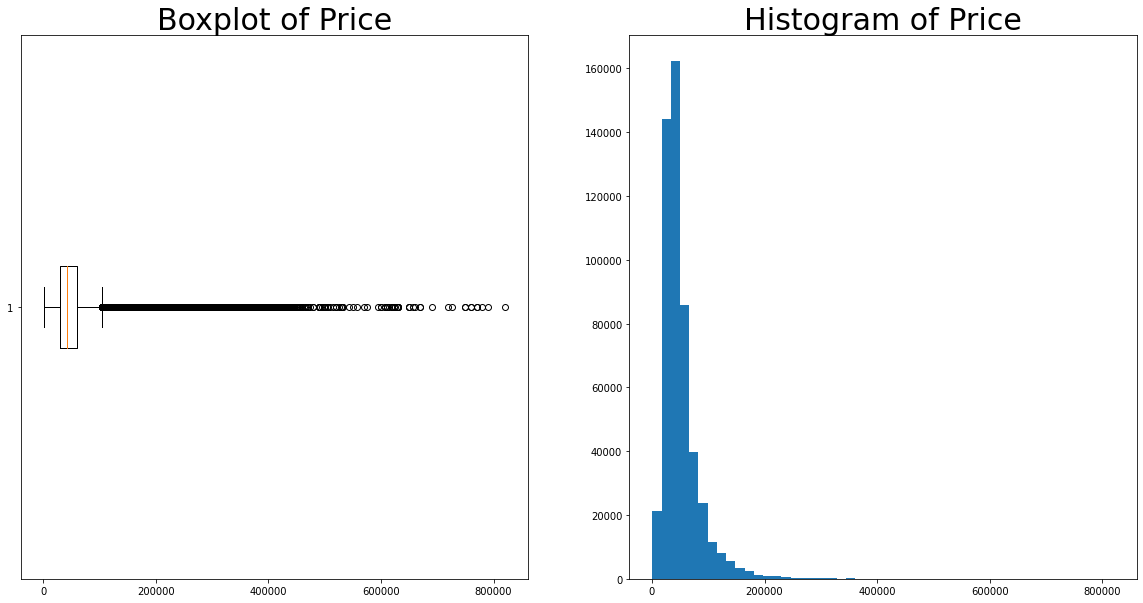

In [20]:
firstplot = plt.figure(figsize=(20,10)) # (20, 10)  사이즈의 firstplot이란 plot을 생성할거임
axes1 = firstplot.add_subplot(1, 2, 1) # 플랏을 분할할건데, 1행 2열로 분할할거고, 이건 그중 첫번째 플랏임
axes2 = firstplot.add_subplot(1, 2, 2) # 이건 그중에 두번째 플랏임

axes1.boxplot(data1['price'],vert=False) # 첫번째 플랏: boxplot, verse=False:가로로 눕힐거임
axes1.set_title ('Boxplot of Price',fontsize=30)# 플랏 제목, 폰트 사이즈:30


axes2.hist(data1['price'],bins=50) # 두번째 플랏: histogram, bin을 50개로 구성
axes2.set_title('Histogram of Price',fontsize=30)
####################### Price x축에???????????!!!!!!

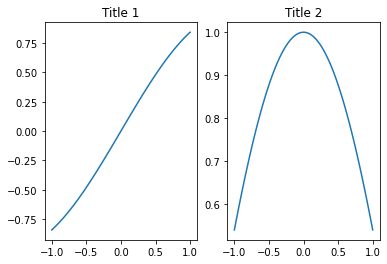

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
sin= np.sin(x)
cos= np.cos(x)

fig, ax = plt.subplots(1, 2)

ax[0].plot(x, sin)
ax[1].plot(x, cos)

ax[0].set_title("Title 1")
ax[1].set_title("Title 2")

plt.show()

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

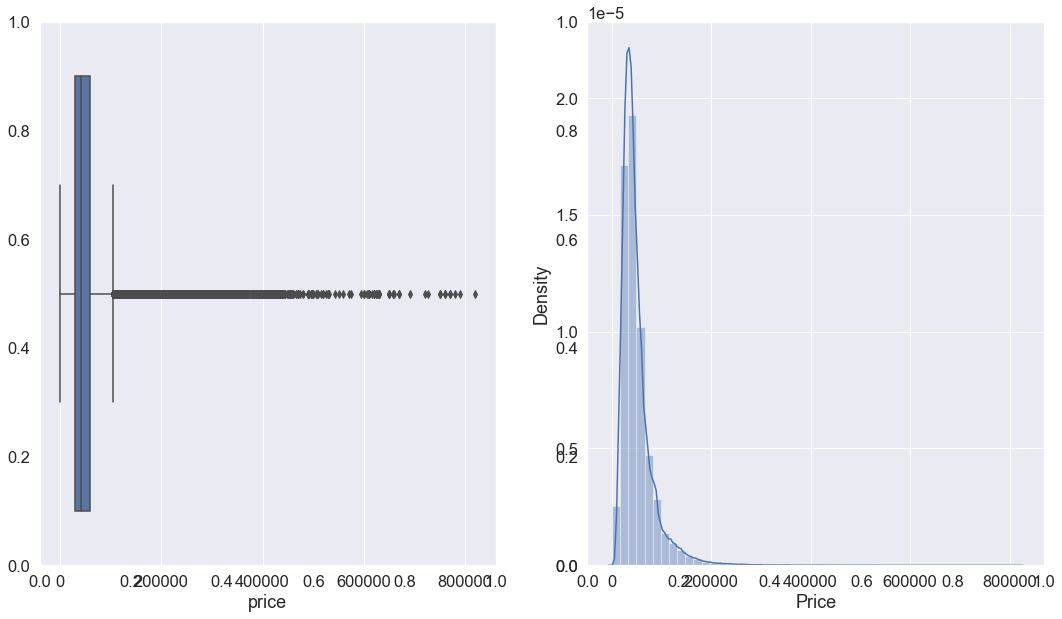

In [22]:
sns.set(font_scale = 1.5) # 폰트사이즈를 전체적으로 키워준다
fig, axes = plt.subplots(1,2,figsize = (18, 10)) #서브플랏을 1행 2열로 분할하고 #nrows=1,ncols = 2,
ax01=fig.add_subplot(1,2,1)
ax02=fig.add_subplot(1,2,2)

sns.set(font_scale = 1.5) # 폰트사이즈를 전체적으로 키워준다
sns.boxplot(x = "price",  data = data1, ax=ax01)
k = pd.Series(data1['price'], name="Price")
sns.distplot(k,ax=ax02)

#axes[0].boxplot(x = "price",  data = data1)
#x = pd.Series(data1['price'], name="Price")
#axes[1] = sns.distplot(x)
#sns.boxplot(x = "price",  data = data1,ax=axes[0][0])
#sns.distplot(pd.Series(data1['price'], name="Price"),ax=axes[0][1])
#sns.distplot(data1['price'], bins=50)

## 2.2 거래연도 분포 확인 / 거래연도별 가격 분포 확인
- 왼쪽에는 거래연도별 거래 횟수의 분포를, 오른쪽에는 거래연도별 거래 가격의 분포를 그려주세요.
- 더불어서 제목, y축 label을 쓰세요.
- 플랏을 해석해주세요.

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


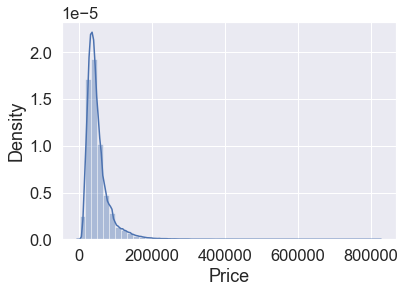

In [23]:
import pandas as pd
plt.ylabel("")
x = pd.Series(data1['price'], name="Price")
ax = sns.distplot(x)

<AxesSubplot:xlabel='price'>

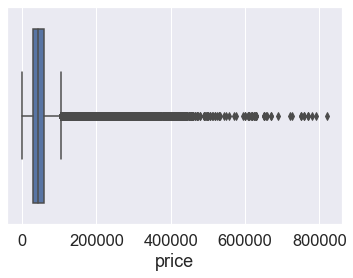

In [24]:
sns.boxplot(x = "price",  data = data1)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transaction_year', ylabel='price'>

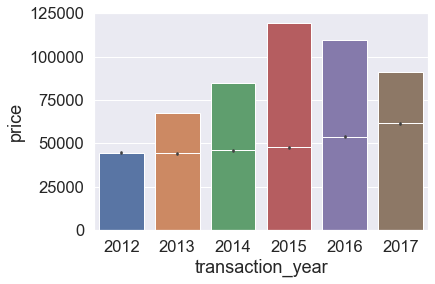

In [25]:
sns.countplot('transaction_year',data=data1)
sns.barplot(data=data1, x='transaction_year', y='price')

## 2.3 층 분포 확인 / 층별 가격 분포 확인
- 왼쪽에는 층별 거래횟수의 분포를, 오른쪽에는 층별 평균거래가격의 분포를 그려주세요.
- 오른쪽 barplot의 error바는 없애서 표현해주세요
- x축은 없애주세요
- '고층일수록 비싸지 않을까?' 라는 가설을 확인하기 위함입니다.
- 결과를 해석해주세요

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


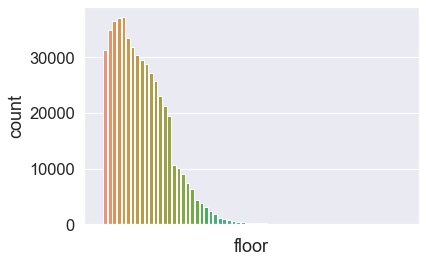

In [26]:
a=sns.countplot('floor',data=data1)
a.set(xticklabels=[])  # remove the tick labels
#a.set(xlabel=None)
plt.show()

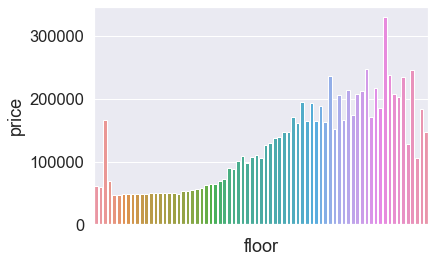

In [27]:
a=sns.barplot(data=data1, x='floor', y='price', ci=None)#신뢰구간(ci)제거
a.set(xticklabels=[])
plt.show()

## 2.4 완공연도 분포 확인 / 완공연도별 가격 분포 확인
- 왼쪽에는 완공연도별 거래횟수의 분포를, 오른쪽에는 완공연도별 평균거래가격의 분포를 그려주세요.
- x축은 없애주세요. 오른쪽일수록 최근입니다.
- '최근의 아파트들이 더 비싸지 않을까?'라는 가설을 확인하고 싶습니다.
- 결과를 해석해주세요.

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


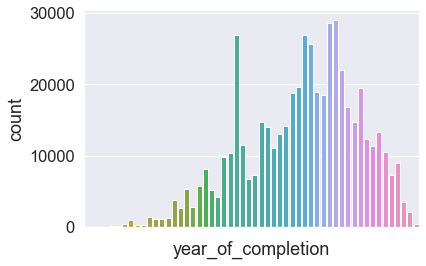

In [28]:
a=sns.countplot('year_of_completion',data=data1)
a.set(xticklabels=[])  # remove the tick labels
#a.set(xlabel=None)
plt.show()

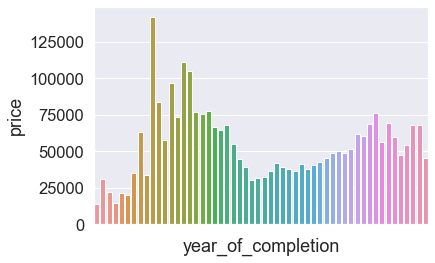

In [29]:
a=sns.barplot(data=data1, x='year_of_completion', y='price', ci=None)#신뢰구간(ci)제거
a.set(xticklabels=[])
plt.show()

## 3. 파생변수 생성
## 3.1 아파트 연차 변수 생성
- 아파트 연차가 오래될수록 거래가격이 낮지 않을까?
- 이를 반영하기 위해 아파트 연차 변수 until_trans를 생성합시다.
- 그리고 이를 시각화해봅시다.
- 그리고 해석해주세요
- 단순히 아파트 연차를 넣는 것 이외에 어떤 방식으로 파생변수를 만들 수 있을까요?

In [30]:
add_col=2021-data1['year_of_completion'].values
data1['until_trans']=add_col
#data['until_trans']=data1[2021-data1[['year_of_completion']].astype(int)]
#data1=data[data['city']=='서울특별시']
####변수 맞나??

In [31]:
data1.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,1,13
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,1,13
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,1,13
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,1,16
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,1,16


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


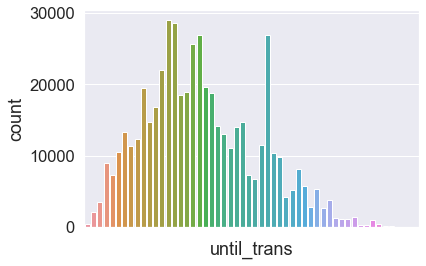

In [32]:
a=sns.countplot('until_trans',data=data1)
a.set(xticklabels=[])  # remove the tick labels
#a.set(xlabel=None)
plt.show()

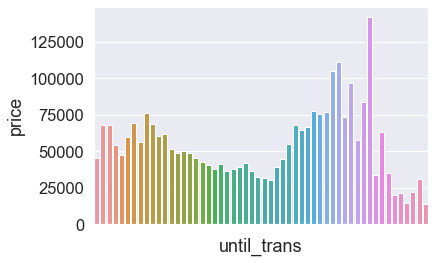

In [33]:
a=sns.barplot(data=data1, x='until_trans', y='price', ci=None)#신뢰구간(ci)제거
a.set(xticklabels=[])
plt.show()

## 3.2 거래 일 변수 변환
- 1~10은 0으로, 11~20은 1로, 21~28/21~29/21~30/21~31은 2로 변환하자.
- np.where을 쓰면 편합니다. R의 ifelse라고 생각하면 됩니다.

In [34]:
data1['transaction_date']=np.where(data1['transaction_date']=='1~10',0,data1['transaction_date'])
data1['transaction_date']=np.where(data1['transaction_date']=='11~20',1,data1['transaction_date'])
data1['transaction_date']=np.where(data1['transaction_date'].isin([0,1]),data1['transaction_date'],2)

In [35]:
data1.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,2012,1,13
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,1,11,100500,2012,1,13
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,1,1,65800,2012,1,13
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,0,8,30500,2012,1,16
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,2,15,30500,2012,1,16


## 3.3 월 변수와 10일 단위 변수 통합
- 10일 단위로 월/일 변수를 통합하는 과정입니다.
- 월과 일을 한번에 다룰 수 있도록 파생변수를 만들어주세요
- 변수 이름은 transaction_month_date로 해주세요.
- 다음과 같은 결과가 나오면 됩니다.

In [37]:
add_col1=data1['transaction_month'].values*3+data1['transaction_date'].values
data1['transaction_month_date']=add_col1

In [38]:
data1[['transaction_month_date', 'transaction_month', 'transaction_date']]

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


## 3.4 연도별 주기성을 위한 파생변수 생성 (삼각변환)
https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/
- 다음의 자료를 참고해서 3.3에서 생성한 변수에 대해 삼각변환을 시행해주세요!
- 변수명은 sin_date, cos_date로 지정해주세요.
- year_of_completion, transaction_year_month, transaction_date, transaction_month, transaction_month_date 변수를 제거하세요

In [ ]:
import math # 삼각변환 위한 패키지

## 3.5 삼각변환을 통한 장점
- 만약 이런식으로 처리하지 않고, 시기별로 dummy(one-hot)을 잡거나, label인코딩을 하면 어떻게 될까요?
- 이런식으로 삼각변환 했을 때의 장점을 말해주세요.
- 다음의 자료를 참고하세요. 직접적으로 관련되기도, 간접적으로 관련되기도 합니다.
https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca
- 꼭 둘다 읽어주세요!
https://skyjwoo.tistory.com/entry/positional-encoding%EC%9D%B4%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80
- 현재 자연어처리에 가장 많이 사용되는 트랜스포머 구조에서 positional encoding에 대한 설명입니다.

## 4. 텍스트 데이터 다루기
- 보통 이런 정형데이터 분석에서 텍스트 데이터가 끼면 난감합니다. 다만 이런 텍스트들에도 유의미한 정보들이 존재할겁니다.

- 우리는 보통 아파트 이름에 막 영어 들어가고 세련될수록 비쌀 것이라고 예측할 수 있습니다.
- 무궁화아파트보다는 힐스테이트, 롯데캐슬이 더 비쌀 것 같잖아요?
- 이런 정보를 담아낼 수 있도록 과정을 거쳐봅시다.

In [45]:
data1['apt'].unique()

array(['광화문풍림스페이스본(9-0)', '로얄팰리스스위트', '현대뜨레비앙', ..., '현대제이드', '풍천',
       '래미안강동팰리스'], dtype=object)

## 4.1 아파트 이름 한글부분만 뽑기
- 아파트의 이름만 가져와서, 한글만 남기세요.

- 데이터의 apt열을 가져와서 apt 변수명에 저장하세요.
- 특수문자/숫자를 모두 제거하세요.
- 앞에 광화문과 같은 지역명은 그냥 남기세요.
- 해당 결과를 head를 통해 보여주세요.

In [41]:
data1.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans,transaction_month_date
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,2012,1,13,3
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,1,11,100500,2012,1,13,4
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,1,1,65800,2012,1,13,4
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,0,8,30500,2012,1,16,3
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,2,15,30500,2012,1,16,5


## 4.2 아파트 이름 DTM
- 아파트 이름에 대한 문서단어행렬을 만드세요.

- 사이킷런의 CountVectorizer를 이용하세요. 이때 min_df = 5로 지정해주세요

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

## 4.3 아파트 이름 tf-idf
- 아파트 이름에 대한 문서단어행렬을 만드세요.

- 사이킷런의 TfidfVectorizer를 이용하세요. 이때 min_df = 5로 지정해주세요.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## 4.4 질문
- 해당 방식으로 만든 행렬을 원래 데이터프레임에 붙여서 분석/모델링을 진행한다고 생각해봅시다.

- 어떤 문제점이 발생할 수 있을까요?
- 해당 어떤 방식으로 개선할 수 있을까요?

## 4.5 질문
- 신입기수분들은 4.5번에 반드시 답변하지 않아도 괜찮습니다.

- 만약 해당 아파트 이름을 word2vec으로 임베딩해, 임베딩된 행렬을 원래 데이터프레임에 붙여서 문석 모델링을 진행한다고 합시다.

- 이때 word2vec은 100차원에 임베딩 됩니다. (size=100)
- word2vec은 잘 작동할 수 있을까요?
- 만약에 잘 작동할/작동하지 않을 것 같다면 그 이유를 설명해주세요.
- 2021-01/2020-02 딥러닝 팀 3주차 교안을 참고하는 것도 좋습니다.


## 5. 인코딩
현실적인 이유로 정형데이터 모델링에서는 텍스트를 자연어처리에서의 접근으로 임베딩하는 것보단, 인코딩하는 것이 일반적입니다. 다만 동일하게 원핫으로 하게되면 범주가 많은 경우 힘들 수 있겠죠? 어려움을 직접 마주하고 해결해봅시다.

## 5.1 원핫 인코딩
- dong과 apt 변수에 대해 원핫 인코딩을 시행하고, 원래변수명_onehot로 저장해주세요.
- 조금 오래 걸릴 수 있습니다.
- 만들어진 데이터프레임의 차원을 확인하고, 원핫 인코딩이 이 상황에 적절할지 말해주세요.

## 5.2 레이블(label) 인코딩 - transaction_year
- 원래 데이터에서 transaction_year에 대해 label 인코딩을 시행하세요. 그리고 head()로 결과를 보여주세요.
- 연도 자체는 하나의 범주로 인식할 수 있으니 인코딩을 시행해줍니다.
- 이런 인코딩이 적절할지 2.2의 시각화를 보고 답변해주세요.

## 5.3 레이블(label) 인코딩
- dong과 apt 변수에 대해 레이블 인코딩을 시행하고, 원래변수명_label로 저장해주세요.
- 그리고 head()로 결과를 보여주세요.
- 이런 방식의 인코딩이 적절한지 답변해주세요.

In [ ]:
data_label.head()

## 5.3 mean encoding
- 원래변수명_mean을 만드세요.
- 해당 데이터에 대해 apt변수에 대해 mean encoding을 시행하세요. head()를 통해 확인하세요.
- 이런 인코딩이 적절할지, 장/단점에 대해 말해주세요.

In [ ]:
data.head()